## Data Analysis Notebook

In this notebook, we use matplotlib, geopandas, and seaborn to conduct fundamental analysis and visualize data and metadata retrieved from the Data Retrieval Notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import geopandas

In [ ]:
# Plot the distribution of wind speed for all 100 points at 60 min resolution
# Noticeably, this distribution is very consistently skewed right regardless of the point
for filename in os.listdir(r"Data\NOW-23 Great Lakes [2000-2020] 60min"):
    data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/" + filename, index_col=0)
    data = data[data["Hour"] == 0]
    data["wind speed at 80m (m/s)"].hist(bins=50)

C:\Users\shell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



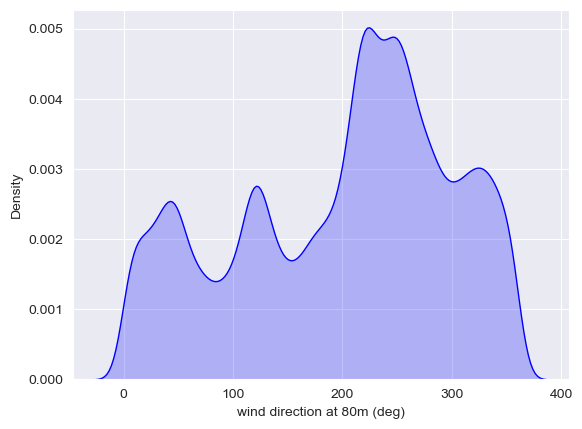

In [62]:
# Let's look at the wind direction data for a single point at 5 min resolution
data = pd.read_csv("Data/NOW-23 Great Lakes [2000-2020] 60min/15713.csv", index_col=0)

# We can draw a nice line representing the histogram using Kernel Density Estimation
sns.kdeplot(data["wind direction at 80m (deg)"], color="blue", fill=True)
plt.show()

C:\Users\shell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



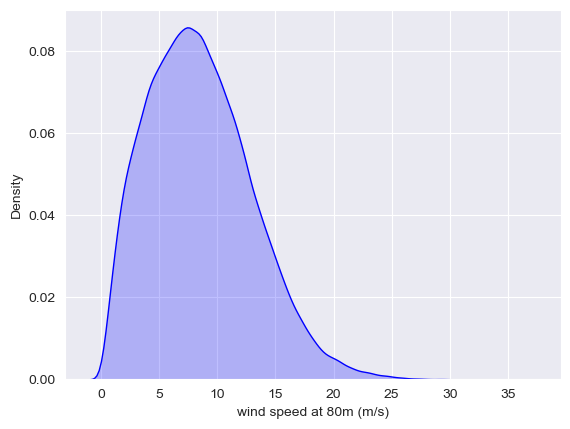

In [63]:
# We can do the same for the wind speed
sns.kdeplot(data["wind speed at 80m (m/s)"], color="blue", fill=True)
plt.show()

<Axes: >

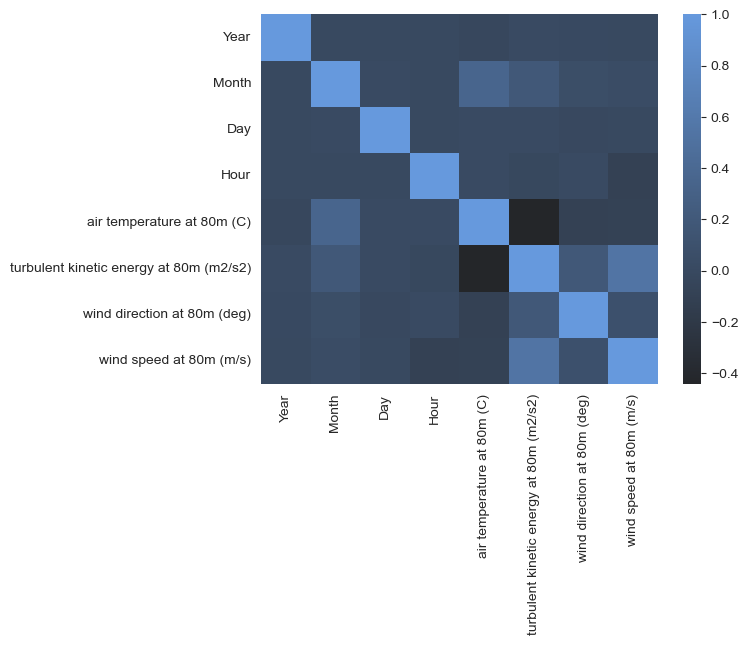

In [64]:
# We can make a correlation matrix to visualize the correlation between the variables
corr_matrix = data.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8]].corr()
blue_map = sns.dark_palette("#69d", reverse=False, as_cmap=True)
sns.heatmap(corr_matrix, cmap=blue_map, annot=False)

In [75]:
# Bin the data so we can create a wind rose chart
df = pd.DataFrame()
df['direction'] = ['N', 'NNE', 'NE', 'ENE', 'E', "ESE", "SE", "SSE", "S", 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'] * 8
df['strength (m/s)'] = ['0-2'] * 16 + ['2-4'] * 16 + ['4-6'] * 16 + ['6-8'] * 16 + ['8-10']* 16 + ['10-12'] * 16 + ['12-14'] * 16 + ['14+'] * 16
df['frequency'] = [0] * len(df)

for i in  range(len(data)):
    direction, speed = data.iloc[i, 7:9]
    index = 0
    
    if np.round(speed)/2 >= 7:
        index += 16 * 7
    else:
        index += 16 * np.round(speed)/2
    
    if np.round(direction/22.5) == 16:
        index += 0
    else:
        index += np.round(direction/22.5)
    df.iloc[int(index), 2] += 1
df

,direction,strength (m/s),frequency
0,N,0-2,37
1,NNE,0-2,36
2,NE,0-2,29
3,ENE,0-2,47
4,E,0-2,40
...,...,...,...
123,WSW,14+,3506
124,W,14+,3307
125,WNW,14+,1958
126,NW,14+,1414


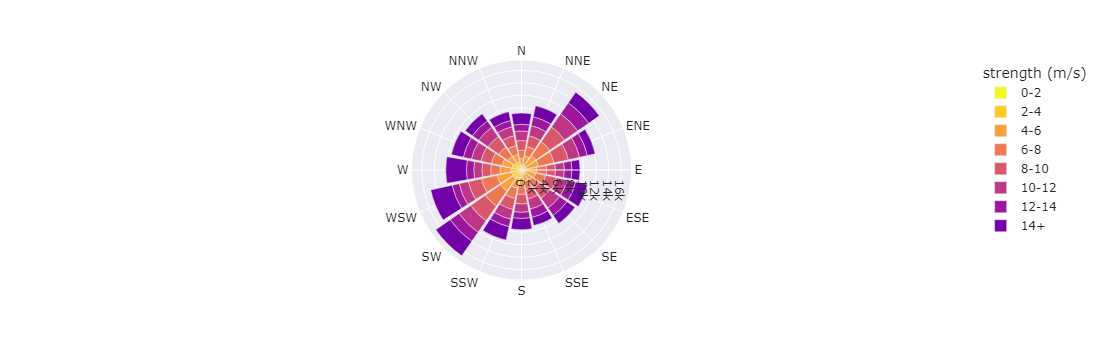

In [76]:
import plotly.express as px
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength (m/s)", template="seaborn",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [ ]:
metadata = geopandas.read_file(r"Data\NOW-23 Great Lakes [2000-2020] metadata.csv").iloc[:, 1:]

gdf = geopandas.GeoDataFrame(
    metadata, geometry=geopandas.points_from_xy(metadata['Longitude'], metadata['Latitude']), crs="EPSG:4326"
)

gdf.explore(marker_type="circle_marker", marker_kwds=dict(radius=7))